In [1]:
# Imports
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Cargamos la imagen en blanco y negro
imagen = Image.open('monalisa_bw.tif')

[]

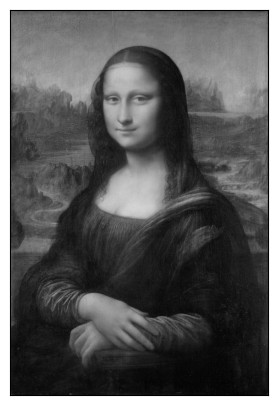

In [3]:
# Visualizamos
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.imshow(imagen, cmap='gray', vmin=0, vmax=255)

# Removemos ejes y ticks
axes.set_xticks([])
axes.set_yticks([])

In [4]:
# La convertimos a un numpy array
datos_imagen = np.asarray(imagen)
datos_imagen.shape, datos_imagen

((4471, 3000),
 array([[119, 105, 102, ..., 100,  88,  81],
        [112, 113, 115, ...,  98,  77,  85],
        [114, 117, 110, ...,  72,  72,  94],
        ...,
        [117, 123, 133, ...,  46,  51,  60],
        [126, 101,  87, ..., 106, 151, 114],
        [113,  86,  80, ..., 107, 173, 124]], dtype=uint8))

In [5]:
# Normalizamos entre 0 y 1
datos_imagen = datos_imagen / 255.
datos_imagen

array([[0.46666667, 0.41176471, 0.4       , ..., 0.39215686, 0.34509804,
        0.31764706],
       [0.43921569, 0.44313725, 0.45098039, ..., 0.38431373, 0.30196078,
        0.33333333],
       [0.44705882, 0.45882353, 0.43137255, ..., 0.28235294, 0.28235294,
        0.36862745],
       ...,
       [0.45882353, 0.48235294, 0.52156863, ..., 0.18039216, 0.2       ,
        0.23529412],
       [0.49411765, 0.39607843, 0.34117647, ..., 0.41568627, 0.59215686,
        0.44705882],
       [0.44313725, 0.3372549 , 0.31372549, ..., 0.41960784, 0.67843137,
        0.48627451]])

In [6]:
# Computamos las medias
media = np.mean(datos_imagen[:,:])
media

0.28744789061826154

In [7]:
# Restamos la media (centramos en 0)
datos_imagen = datos_imagen - media

In [8]:
# Computamos la matriz de covarianza
n = datos_imagen.shape[1]

matriz_covarianza = np.zeros((n, n)) # Inicializamos con 0s
matriz_covarianza = np.dot(datos_imagen[:, :].T, datos_imagen[:, :]) # Computamos

matriz_covarianza.shape

(3000, 3000)

In [9]:
# Computamos los autovalores y autovectores de las matrices de covarianza
autovalores, autovectores = np.linalg.eig(matriz_covarianza)
autovalores,autovectores

(array([2.80003798e+05, 8.80264333e+04, 4.55319106e+04, ...,
        5.67423879e-02, 5.47092259e-02, 6.48713757e-02]),
 array([[ 6.16155527e-03, -6.24305545e-03, -8.38069060e-04, ...,
         -7.12420271e-03, -4.96596546e-03,  2.19585970e-04],
        [ 6.39473881e-03, -7.89837616e-03,  8.22323568e-04, ...,
          1.11382886e-02,  1.84658974e-02,  7.11997201e-03],
        [ 6.37903079e-03, -9.84559768e-03, -5.18674345e-04, ...,
         -5.17671923e-03, -2.47136963e-02, -3.96018616e-03],
        ...,
        [ 1.16575824e-02, -2.13010516e-03, -4.42701293e-04, ...,
          1.11532134e-02,  2.10784521e-02, -1.30659163e-02],
        [ 1.10109694e-02, -1.72433900e-03, -1.29017519e-03, ...,
         -4.91209801e-03, -1.43599233e-02,  1.59192208e-02],
        [ 1.07133162e-02, -3.90778759e-05, -2.16051729e-03, ...,
          2.02698418e-03,  7.35742560e-03, -5.81048408e-03]]))

In [10]:
# Este parámetro es la cantidad de autovalores a considerar
# A más bajo, mayor tasa de compresión
k = 15

In [11]:
# Ordenamos los autovalores en orden descendiente y seleccionamos los autovectores correspondientes
indices = np.argsort(autovalores)[::-1]
autovectores_seleccionados = autovectores[:, indices[:k]]

In [12]:
representacion_comprimida = np.dot(datos_imagen, autovectores_seleccionados)
representacion_comprimida.shape

(4471, 15)

In [13]:
# Guardamos archivo "comprimido"
np.save("imagen_comprimida_features.npy" , representacion_comprimida)
np.save("imagen_comprimida_autovectores.npy", autovectores_seleccionados)

### ------

In [14]:
# Leemos archivo comprimido y reconstruimos
datos_comprimidos = np.load("imagen_comprimida_features.npy")
autovectores      = np.load("imagen_comprimida_autovectores.npy")

In [15]:
# Reconstruimos y visualizamos
imagen_reconstruida = Image.fromarray(((np.dot(datos_comprimidos, autovectores.T) + media)*255.).round().astype(np.uint8))

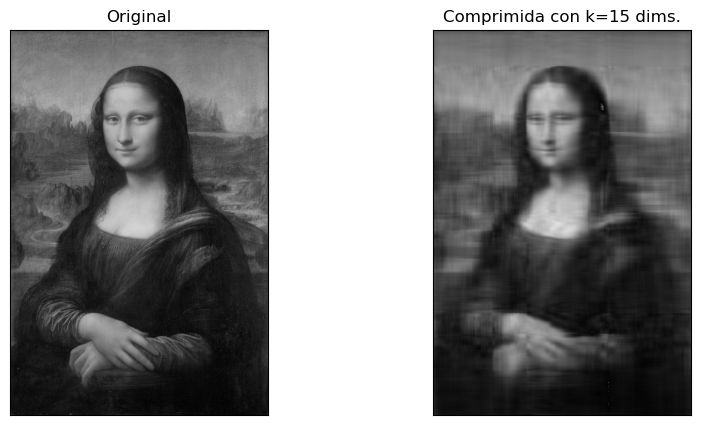

In [16]:
# Mostramos las imágenes (antes y después de la compresión)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imagen, cmap='gray', vmin=0, vmax=255)
axes[1].imshow(imagen_reconstruida, cmap='gray', vmin=0, vmax=255)

# Removemos ejes y ticks
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].set_xticks([])
axes[1].set_yticks([])

# Títulos
axes[0].set_title('Original')
axes[1].set_title('Comprimida con k={} dims.'.format(k))

plt.show()